<a href="https://colab.research.google.com/github/gabriel-libardi/PyTorchINOVA-USP/blob/main/PyTorch_Machine_Learning_Bootcamp_Zurique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Training Bootcamp
## Equipe Zurique

### Download do dataset


In [ ]:
# Baixar e descompactar o dataset
!mkdir dataset
!wget    https://docs.toradex.com/private/114105-recyclables_train.zip​ \
         https://docs.toradex.com/private/114106-recyclables_validation.zip

# Descomprimir arquivos *.zip
!unzip -u '114105-recyclables_train.zip' -d dataset/
!unzip -u '114106-recyclables_validation.zip' -d dataset/

# Definir o caminho do dataset
data_path = "dataset"

### Importar dependências

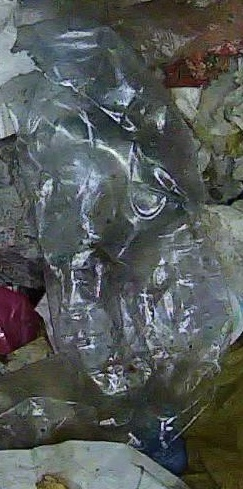

In [ ]:
from IPython.display import Image
Image("/content/dataset/validation_crops/bottle/bottle-blue/Monitoring_photo_2_test_25-Mar_11-13-25_01.jpg", width=256)

In [ ]:
# Carregar a extensão do TensorBoard para o Google Colab
%load_ext tensorboard

In [ ]:
# Instalar Pytorch, Torchvision, Tensorboard e utilidades parar ver o progresso do treinamento
!pip install -q torch torchvision torcheval tensorboard matplotlib tqdm tensorflow ipywidgets seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.2 MB/s eta 0:00:00


In [ ]:
# Módulos, classes e funções que são úteis para inferência e treinamento
import torch, torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.io import read_image
from torcheval.metrics import MulticlassF1Score, MulticlassRecall, MulticlassPrecision

# Suporte a TensorBoard no PyTorch
from torch.utils.tensorboard import SummaryWriter

# Utiliades do sistema
from datetime import datetime
import time
import os

# O Tqdm é utilizado para criar barras de progresso
from tqdm.notebook import tqdm


print(torch.__version__)

In [ ]:
# Declaração da classe herdando de Dataset
class CustomDataset(Dataset):

    # Construtor
    def __init__(self, images_dir, preprocess_function):
        """
        Args:
            images_dir (string): Directory with all the image folders
            preprocess_function (callable): Transform to be applied on a sample
        """

        self.images_dir = images_dir
        self.transform = preprocess_function

        # Ordenamos as classes para termos sempre a mesma ordem
        # Aqui ficam armazenados os nomes de cada classe
        self.general_classes = sorted(os.listdir(self.images_dir))

        # Caminho para cada imagem
        self.image_paths = []
        # Classe de cada imagem (int)
        self.image_classes = []

        # Procura imagens para todas as classes, em suas respectivas pastas
        for i in range(len(self.general_classes)):
          sample_class = self.classes[i]

          class_dir = os.path.join(self.images_dir, sample_class)
          class_general_images = os.listdir(class_dir)

          for general_class in class_general_images:
            for image in class_images:
              if(not (image.endswith(".jpg") or image.endswith(".JPG") or image.endswith(".png") or image.endswith(".PNG"))):
                  continue
              image_path = os.path.join(class_dir, image)
              self.image_paths.append(image_path)

            self.image_classes.append(i)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Checagem por erros na leitura da imagem
        # Isso gera uma nova excessão para que o dataset seja corrigido, não queremos imagens com problemas no dataset
        try:
            sample = read_image(self.image_paths[idx], torchvision.io.ImageReadMode.RGB)
        except:
            print(f"Problem loading image {self.image_paths[idx]}")
            raise Exception()

        # Preprocessamento da imagem
        sample = self.transform(sample)

        # Retorno do par (imagem, classe)
        return sample, self.image_classes[idx]